In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df= pd.read_csv("UpdatedResumeDataSet.csv")
df["cleaned_resume"]= " "

In [3]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [4]:
## displaying unique categories 
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [5]:
##displaying unique category count
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

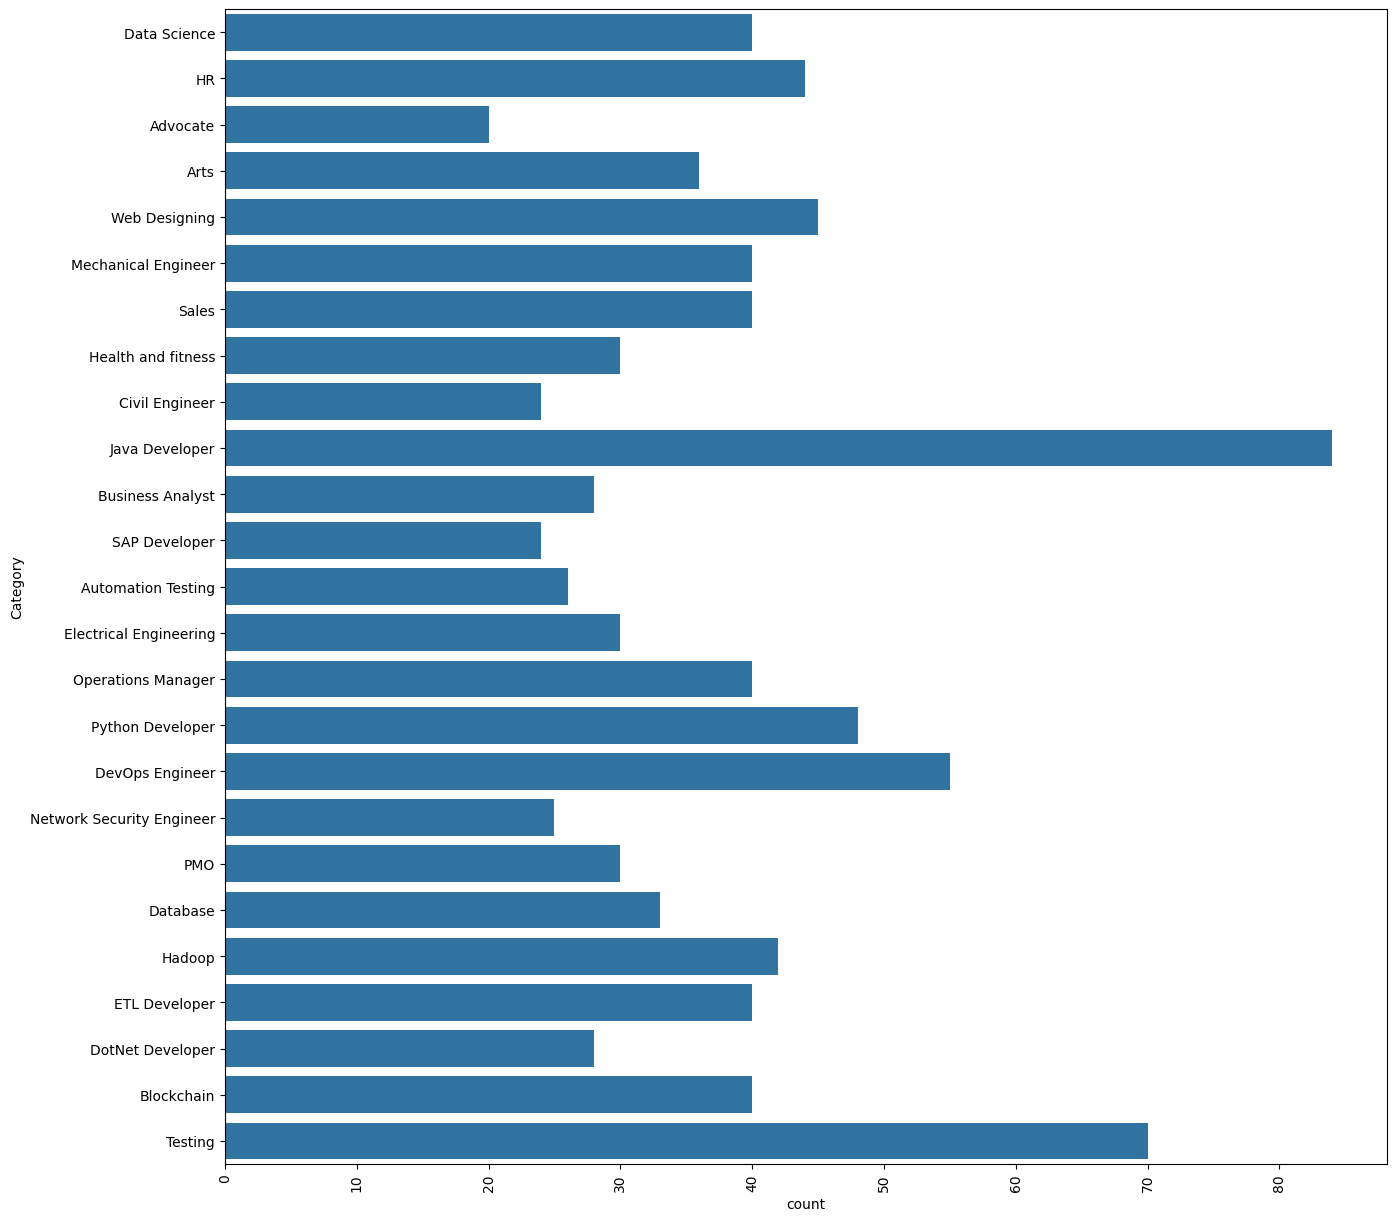

In [6]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data =df)
plt.show()

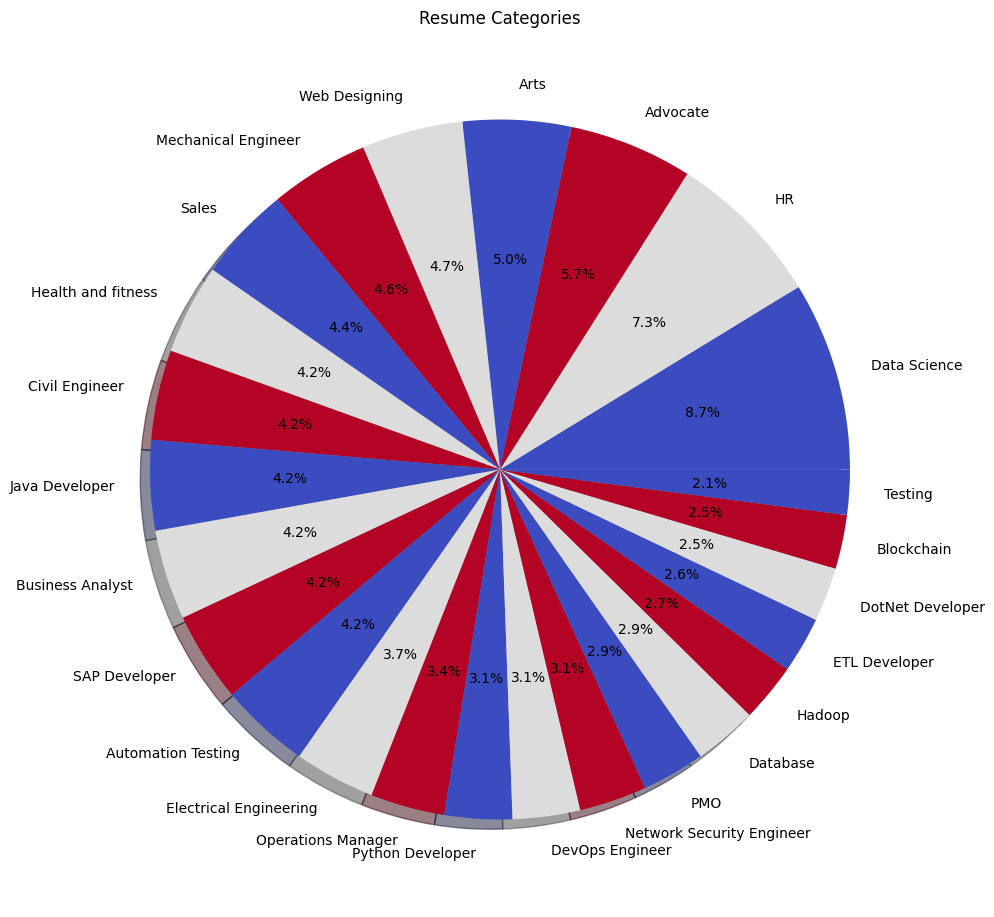

In [7]:
from matplotlib.pyplot import GridSpec
targetcounts= df['Category'].value_counts()
targetlabels = df ["Category"].unique()

## make square figure and axes
plt.figure(figsize=(25,25))
the_grid = GridSpec(2,2)
cmap = plt.get_cmap("coolwarm")
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1],aspect=1,title ="Resume Categories")

source_pie = plt.pie(targetcounts,labels = targetlabels,autopct='%1.1f%%',shadow=True,colors=colors)

In [8]:
import re 
import string
def clean_resume(resume):
    resume = re.sub("http\\S+\\s*"," ",resume) #remove url 
    resume = re.sub("RT|cc"," ",resume) #remove RT and cc
    resume = re.sub("#\\S+"," ",resume) #remove hashtags
    resume = re.sub("@\\S+"," ",resume) #remove mentions
    resume = re.sub("[%s]" % re.escape(string.punctuation)," ",resume) #remove punctuations
    resume = re.sub("\\s+"," ",resume) #remove extra spaces
    resume = re.sub(r"[^\\x00-\\x7f]",r" ",resume) #remove non-ascii charactersp
    return resume

df["cleaned_resume"] = df["Resume"].apply(lambda x: clean_resume(x))
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,S P L P ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,E D M 2013 M 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",A f I D L C S ...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,S R P SAP HANA T ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",E D MCA YMCAUST F H ...


In [9]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
! pip uninstall wordcloud


[('f', 4872760), ('S', 2474620), ('C', 2073484), ('P', 2013066), ('D', 1922380), ('M', 1755828), ('T', 1561126), ('A', 1384320), ('I', 1059954), ('R', 1009108), ('E', 968174), ('L', 924488), ('Ex', 877530), ('B', 830022), ('J', 647638), ('x', 634460), ('W', 616464), ('H', 547262), ('F', 502426), ('O', 489182), ('N', 478468), ('1', 375580), ('U', 369720), ('G', 368484), ('ff', 306090), ('6', 257230), ('V', 236332), ('SQL', 219902), ('K', 212646), ('2', 138950), ('3', 111906), ('Q', 100776), ('4', 94842), ('MS', 76820), ('5', 75742), ('SAP', 74456), ('2016', 67878), ('2017', 65936), ('10', 62148), ('7', 61798), ('24', 60854), ('HTML', 59916), ('ETL', 59448), ('2012', 53430), ('2015', 50872), ('12', 49660), ('Off', 49608), ('2008', 49062), ('8', 47530), ('SKILLS', 46606)]


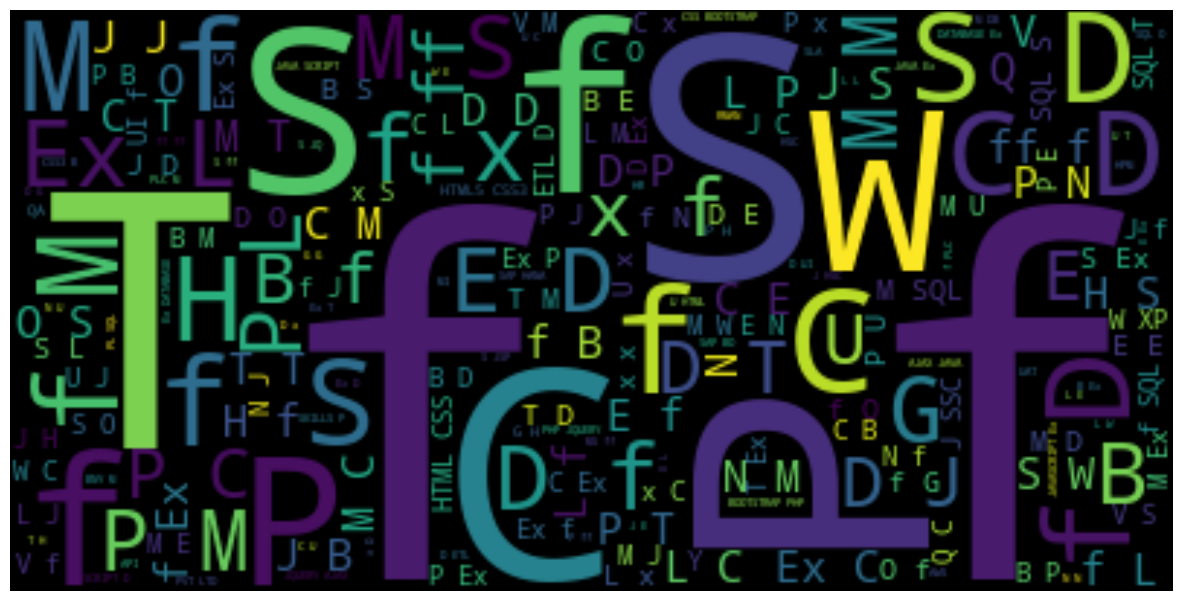

In [49]:
onesetofstopwords = set(stopwords.words("english"))
totalwords = []
sentences =df["cleaned_resume"].values
cleaned_sentences = " ".join(sentences)
for i in range(0,160):
    cleanedText = clean_resume(sentences[i])
    cleaned_sentences += cleanedText
    requiredwords= nltk.word_tokenize(cleaned_sentences)
    for word in requiredwords:
        if word not in onesetofstopwords and word not in string.punctuation:
            totalwords.append(word)

wordfreqdist = nltk.FreqDist(totalwords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleaned_sentences)
plt.figure(figsize=(15, 15))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
from sklearn.preprocessing import LabelEncoder

var_mod = ["Category"]
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [51]:
from  sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [69]:
requiredText = df["cleaned_resume"].values
requiredTarget = df["Category"].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500,
)
word_vectorizer.fit(requiredText)
wordsFeature = word_vectorizer.transform(requiredText)

X_train,X_test,y_train,y_test = train_test_split(
    wordsFeature,
    requiredTarget,
    test_size=0.2,

)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(769, 1500)
(193, 1500)
(769,)
(193,)


In [70]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [71]:

clf.score(X_test,y_test)

0.9067357512953368

In [72]:
clf.score(X_train,y_train)

0.9713914174252276

In [73]:
clf.predict(X_test)

array([ 6,  0, 13, 22,  8, 10, 12,  3, 16, 23, 18, 18,  0, 23, 23, 23,  1,
       15,  1, 22, 18, 24, 18, 12, 21, 15, 15,  0, 17, 23,  8, 15, 24,  7,
       21,  9, 15, 12, 23, 12, 11, 16, 23, 23, 15,  8,  3, 16, 24, 24, 12,
       10,  9, 13, 18,  0, 11, 17, 24, 15, 22, 10, 12, 23,  1, 12, 22, 17,
       20,  1, 15, 16, 10,  8,  3,  7,  9, 17, 19,  5, 16, 22, 10,  7, 23,
       21,  6, 24, 18,  3,  0,  7, 17, 20, 14,  3, 20,  4, 23, 11, 18, 10,
        0, 24, 15, 19, 18,  8, 19,  6,  6,  5, 20, 23, 16,  9, 13, 18, 10,
       22, 23, 20,  4,  9, 21,  1, 14,  3, 14,  8, 24, 15, 23, 22, 16, 19,
       23, 16, 24, 11,  6, 11,  0, 20, 10, 15, 12, 12,  7, 19,  3, 15, 12,
       24, 19, 12,  4, 24,  0, 17, 23, 12, 23, 21, 21,  7, 19, 15, 20, 18,
        1, 11, 10, 23,  0, 13, 15, 16, 24, 19, 24, 13,  0, 10, 23, 12,  4,
       12, 20, 15,  1, 11,  0], dtype=int64)